# 演習５　LLEの実装（高難易度）

## 課題
LLEを実装し，3次元空間上のサンプルデータ（Swiss roll)を（近傍の関係をなるべく保ったまま）2次元平面に埋め込め．

## ヒント
* 降順に並べたときの**インデックス**が必要な場合は`np.argsort`が便利
* 行列の転置は後ろに`.T`をつける．行列どうしの積は`np.matmul`
* 線形連立方程式$Ax=b$を解くには`np.linalg.solve(A, b)`が便利
* 行列$A$の固有ベクトルの計算は`u,V = np.linalg.eig(A)`で行え，固有値からなる行列$u$と固有ベクトルを列に持つ行列$V$が得られる．ただし，この関数は固有値を**ソートしてくれない**ので，例えば最小固有ベクトル（最小固有値と対応する固有ベクトル）が欲しい場合は`u`に対して`np.argsort`等を使う必要が出てくる．
* その他使うと便利な関数`np.eye(K)`($K\times K$の単位行列を作る), `np.trace(A)` 行列$A$のトレース：$\mathrm{tr}(A)$の計算

* $Y$が完成したらこんな感じでプロットすると見やすいでしょう
```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y[0, :], Y[1, :], c=tt.flatten(), cmap=cm.plasma)
plt.show()
```



## 準備
スイスロールの作成

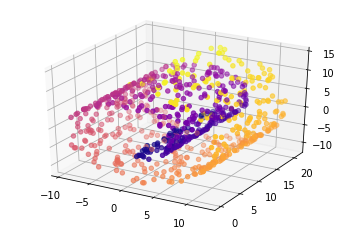

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)
# Swiss Roll
D = 3
N = 800
X = np.zeros((D, N))
tt = (3*np.pi/2.0)*(1.0+2*np.random.rand(1,N))  
X[0, :] = tt*np.cos(tt) 
X[1, :] = 21*np.random.rand(1,N)
X[2, :] = tt*np.sin(tt)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0, :], X[1, :], X[2, :], c=tt.flatten(), cmap=cm.plasma)
plt.show()


In [ ]:
## LLE
K=10 # 近傍の数 K近傍とは，自分を含まない距離最小のデータK個であることに注意
W = np.zeros((N,N))
XXi = np.zeros((D, K))#配布資料でのX_i-X_i^n
